**Hanna Dhea Christi Sihombing**

# <font color="red" size=+2,5><b> **Business Understanding**</b></font>
---

Churn customer merupakan istilah yang dikenal sebagai pelanggan yang berhenti berlangganan. Churn sering terjadi dan muncul pada sebuah perusahaan yang menyediakan layanan, produk, atau pun sistem. Pada Home Credit, churn customer terjadi ketika customer tidak dapat membayar pinjaman secara tepat waktu.Masalah ini sering dihadapi oleh Home Credit karena terjadinya pemberian pinjaman kepada customer yang tidak tepat sasaran.

Prediksi terhadap customer yang rentan mengalami churn perlu dilakukan agar pihak Home Credit dapat lebih berhati-hati dalam memberikan pinjaman, sehingga terjadinya churn customer dapat diminimalisir.

Tujuan bisnis yang ingin dicapai yaitu membentuk model prediksi churn customer berdasarkan feature-feature yang ada untuk membantu pihak Home Credit memberikan pinjaman kepada customer secara tepat sasaran. Harapannya churn customer pada Home Credit dapat berkurang, sehingga kerugian akibat churn customer di Home Credit juga dapat diminimalisir.

---

# <font color="red" size=+2,5><b>**About Dataset**</font>

Ada 7 dataset pada business case ini, yaitu:
* application_train
* bureau
* bureau_balance
* credit_card_balance
* installment_payments
* POS_CASH_balance
* previous_application

#**Business EDA**

##**Import Libraries**##

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')

Mounted at /content/drive


##**Load Dataset**

In [ ]:
application_train = pd.read_csv('drive/MyDrive/dataset/application_train.csv')
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
bureau = pd.read_csv('drive/MyDrive/dataset/bureau.csv')
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [ ]:
ccd = pd.read_csv('/content/drive/MyDrive/TheNightOwls-FinalProject/Dataset/credit_card_balance_clean.csv')

###**Application Train**

cek missing value

In [ ]:
application_train.isnull().sum().head(60)

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [ ]:
#drop kolom ke 41-60
application_train.drop(application_train.columns[41:60], axis=1, inplace=True)

In [ ]:
#cek missing value kembali
application_train.isnull().sum().head(60)

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [ ]:
#drop missing value kolom index 41-60
application_train.drop(application_train.columns[41:60], axis=1, inplace=True)

In [ ]:
#cek kembali missing value
application_train.isnull().sum().head(60)

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [ ]:
#drop missing value pada kolom index 41-56
application_train.drop(application_train.columns[41:56], axis=1, inplace=True)

In [ ]:
#cek kembali missing value
application_train.isnull().sum().head(60)

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [ ]:
application_train.isnull().sum().tail(20)

FLAG_DOCUMENT_8                   0
FLAG_DOCUMENT_9                   0
FLAG_DOCUMENT_10                  0
FLAG_DOCUMENT_11                  0
FLAG_DOCUMENT_12                  0
FLAG_DOCUMENT_13                  0
FLAG_DOCUMENT_14                  0
FLAG_DOCUMENT_15                  0
FLAG_DOCUMENT_16                  0
FLAG_DOCUMENT_17                  0
FLAG_DOCUMENT_18                  0
FLAG_DOCUMENT_19                  0
FLAG_DOCUMENT_20                  0
FLAG_DOCUMENT_21                  0
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [ ]:
#drop kolom missing value
#drop 6 baris terbawah
application_train.drop(application_train.columns[-6:-1], axis=1, inplace=True)

In [ ]:
application_train.isnull().sum().tail(20)

FLAG_DOCUMENT_3                   0
FLAG_DOCUMENT_4                   0
FLAG_DOCUMENT_5                   0
FLAG_DOCUMENT_6                   0
FLAG_DOCUMENT_7                   0
FLAG_DOCUMENT_8                   0
FLAG_DOCUMENT_9                   0
FLAG_DOCUMENT_10                  0
FLAG_DOCUMENT_11                  0
FLAG_DOCUMENT_12                  0
FLAG_DOCUMENT_13                  0
FLAG_DOCUMENT_14                  0
FLAG_DOCUMENT_15                  0
FLAG_DOCUMENT_16                  0
FLAG_DOCUMENT_17                  0
FLAG_DOCUMENT_18                  0
FLAG_DOCUMENT_19                  0
FLAG_DOCUMENT_20                  0
FLAG_DOCUMENT_21                  0
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [ ]:
#Drop kolom OWN_CAR_AGE dan AMT_REQ_CREDIT_BUREAU_YEAR
application_train.drop('OWN_CAR_AGE', axis=1, inplace=True)
application_train.drop('AMT_REQ_CREDIT_BUREAU_YEAR', axis=1, inplace=True)


In [ ]:
#Handling missing value
application_train['AMT_ANNUITY'] = application_train['AMT_ANNUITY'].fillna(application_train['AMT_ANNUITY'].median())
application_train['AMT_GOODS_PRICE'] = application_train['AMT_GOODS_PRICE'].fillna(application_train['AMT_GOODS_PRICE'].median())
application_train['NAME_TYPE_SUITE'] = application_train['NAME_TYPE_SUITE'].fillna(application_train['NAME_TYPE_SUITE'].mode()[0])
application_train['OCCUPATION_TYPE'] = application_train['OCCUPATION_TYPE'].fillna(application_train['OCCUPATION_TYPE'].mode()[0])
application_train['DEF_60_CNT_SOCIAL_CIRCLE'] = application_train['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(application_train['DEF_60_CNT_SOCIAL_CIRCLE'].median())
application_train['CNT_FAM_MEMBERS'] = application_train['CNT_FAM_MEMBERS'].fillna(application_train['CNT_FAM_MEMBERS'].median())
application_train['DAYS_LAST_PHONE_CHANGE'] = application_train['DAYS_LAST_PHONE_CHANGE'].fillna(application_train['DAYS_LAST_PHONE_CHANGE'].median())

In [ ]:
#cek kembali missing value
application_train.isnull().sum().head(60)

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

In [ ]:
application_train.isnull().sum().tail(20)

FLAG_DOCUMENT_2     0
FLAG_DOCUMENT_3     0
FLAG_DOCUMENT_4     0
FLAG_DOCUMENT_5     0
FLAG_DOCUMENT_6     0
FLAG_DOCUMENT_7     0
FLAG_DOCUMENT_8     0
FLAG_DOCUMENT_9     0
FLAG_DOCUMENT_10    0
FLAG_DOCUMENT_11    0
FLAG_DOCUMENT_12    0
FLAG_DOCUMENT_13    0
FLAG_DOCUMENT_14    0
FLAG_DOCUMENT_15    0
FLAG_DOCUMENT_16    0
FLAG_DOCUMENT_17    0
FLAG_DOCUMENT_18    0
FLAG_DOCUMENT_19    0
FLAG_DOCUMENT_20    0
FLAG_DOCUMENT_21    0
dtype: int64

In [ ]:
#melihat duplicate
application_train.duplicated().sum()

0

In [ ]:
#drop duplicate
application_train = application_train.drop_duplicates(keep='first')

In [ ]:
#melihat kembali duplicate
application_train.duplicated().sum()

0

**1. Melihat jumlah costumer dari variabel TARGET**

In [ ]:
#melihat isi nilai kolom 'TARGET'
pd.DataFrame(application_train['TARGET'].value_counts())

,TARGET
0,282686
1,24825


**Ada sebanyak 24825 customer yang tidak akan membayar pinjaman secara tepat waktu (susah untuk membayar pinjaman).\
dan sebanyak 282686 customer yang akan membayar pinjaman secara tepat waktu.**

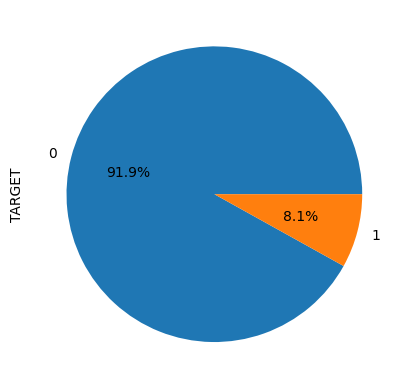

In [ ]:
application_train['TARGET'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [ ]:
not_repay = (len(application_train[application_train['TARGET']==1])/len(application_train))*100
repay = (len(application_train[application_train['TARGET']==0])/len(application_train))*100

print('Jumlah customer yang tidak akan membayar pinjaman secara tepat waktu : {:.2f}%'.format(not_repay))
print('Jumlah customer yang akan membayar pinjaman secara tepat waktu : {:.1f}%'.format(repay))

Jumlah customer yang tidak akan membayar pinjaman secara tepat waktu : 8.07%
Jumlah customer yang akan membayar pinjaman secara tepat waktu : 91.9%


**2. Melihat costumer dari variabel CODE_GENDER**

In [ ]:
#Melihat nilai di kolom 'CODE GENDER'
application_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Ada XNA sebanyak 4, ganti dengan modus

In [ ]:
application_train.loc[application_train['CODE_GENDER']=='XNA'] = np.NAN
application_train['CODE_GENDER'] = application_train['CODE_GENDER'].fillna(application_train['CODE_GENDER'].mode()[0])

In [ ]:
#Cek kembali CODE GENDER
application_train['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

Sudah tidak ada XNA

**3. Melakukan visualisasi data untuk menampilkan costumer yang churn dan loyal menggunakan variabel TARGET dan CODE_GENDER**

In [ ]:
loyal = application_train[application_train['TARGET'] == 1.0]
churn = application_train[application_train['TARGET'] == 0.0]

Berikut merupakan jumlah customer yang loyal, dengan perempuan sejumlah dengan 57,1% dan laki-laki 42,9%

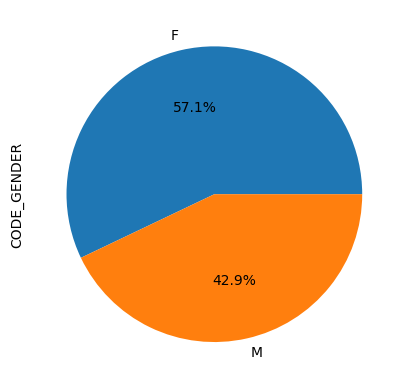

In [ ]:
loyal['CODE_GENDER'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

Dibandingkan dengan ini, merupakan costumer yang melakukan churn yaitu perempuan sebanyak 66,6% dan laki-laki 33,4%

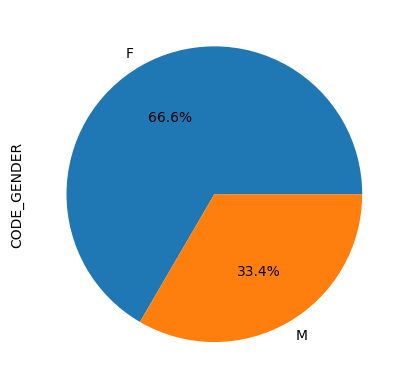

In [ ]:
churn['CODE_GENDER'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

Berikut merupakan data dari keseluruhan customer berdasarkan code gender. Jumlah customer paling banyak adalah perempuan.

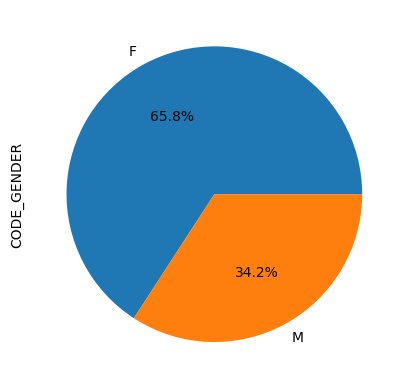

In [ ]:
application_train['CODE_GENDER'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

**4. Menampilkan bentuk pembayaran kredit yang dilakukan oleh customer**

In [ ]:
#Cek kolom NAME_CONTRACT_TYPE
application_train['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29275
Name: NAME_CONTRACT_TYPE, dtype: int64

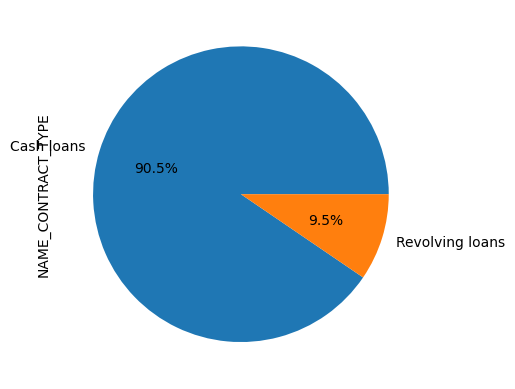

In [ ]:
application_train['NAME_CONTRACT_TYPE'].value_counts().plot(kind='pie', autopct='%2.1f%%')
plt.show()

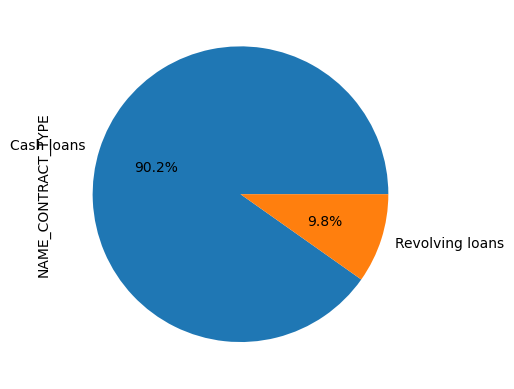

In [ ]:
churn['NAME_CONTRACT_TYPE'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

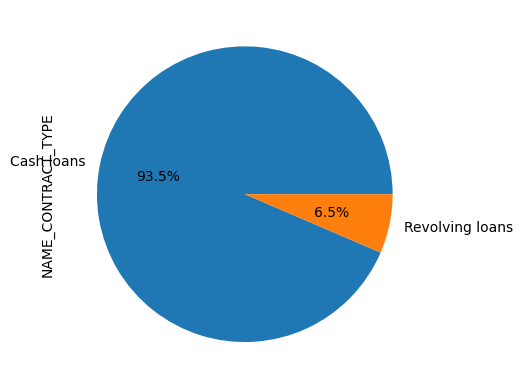

In [ ]:
loyal['NAME_CONTRACT_TYPE'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

Sebagian besar customer mengambil tipe kontrak pinjaman Cash Loan.

In [ ]:
application_train['FLAG_OWN_CAR'].value_counts()

N    202922
Y    104585
Name: FLAG_OWN_CAR, dtype: int64

Sebagian besar customer tidak memiliki mobil.

In [ ]:
#Cek kolom FLAG_OWN_REALTY
application_train['FLAG_OWN_REALTY'].value_counts()

Y    213308
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Sebagian besar customer memiliki rumah sendiri.

In [ ]:
#Melihat jumlah anak customer
application_train['CNT_CHILDREN'].value_counts()

0.0     215369
1.0      61118
2.0      26748
3.0       3717
4.0        429
5.0         84
6.0         21
7.0          7
14.0         3
8.0          2
9.0          2
12.0         2
10.0         2
19.0         2
11.0         1
Name: CNT_CHILDREN, dtype: int64

In [ ]:
#buat kategori untuk jumlah anak customer, 0 untuk jumlah anak <= 2, dan 1 untuk jumlah anak > 2
application_train.loc[application_train['CNT_CHILDREN'].between(0,2, inclusive=True), 'CNT_CHILDREN'] = 0
application_train.loc[application_train['CNT_CHILDREN'].between(3,19, inclusive=True), 'CNT_CHILDREN']= 1

<ipython-input-33-a2c4cf24edbe>:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  application_train.loc[application_train['CNT_CHILDREN'].between(0,2, inclusive=True), 'CNT_CHILDREN'] = 0
<ipython-input-33-a2c4cf24edbe>:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  application_train.loc[application_train['CNT_CHILDREN'].between(3,19, inclusive=True), 'CNT_CHILDREN']= 1


In [ ]:
#Cek kembali kolom CNT_CHILDREN yang baru
pd.DataFrame(application_train['CNT_CHILDREN'].value_counts())

,CNT_CHILDREN
0.0,303235
1.0,4272


Customer paling banyak memiliki anak <= 2

In [ ]:
#melihat income customer
application_train['AMT_INCOME_TOTAL'].value_counts()

135000.0    35749
112500.0    31019
157500.0    26555
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

Membuat kategori income
* Low (< USD1.085 atau < Rp15920.80) --> 0
* Lower Middle (USD1.086-USD4.255 atau Rp15935.48-Rp62435.96) --> 1
* Upper Middle (USD4.256-USD13.205 atau Rp62450.63-Rp193764.23) --> 2
* High (>USD13.205 atau Rp193764.23) --> 3

In [ ]:
application_train.loc[application_train['AMT_INCOME_TOTAL']<15920.80, 'AMT_INCOME_TOTAL'] = 0
application_train.loc[application_train['AMT_INCOME_TOTAL'].between(15935.48,62435.96, inclusive=True), 'AMT_INCOME_TOTAL'] = 1
application_train.loc[application_train['AMT_INCOME_TOTAL'].between(62450.63,193764.23, inclusive=True), 'AMT_INCOME_TOTAL'] = 2
application_train.loc[application_train['AMT_INCOME_TOTAL']>193764.23, 'AMT_INCOME_TOTAL'] = 3

<ipython-input-36-a9aec14d9652>:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  application_train.loc[application_train['AMT_INCOME_TOTAL'].between(15935.48,62435.96, inclusive=True), 'AMT_INCOME_TOTAL'] = 1
<ipython-input-36-a9aec14d9652>:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  application_train.loc[application_train['AMT_INCOME_TOTAL'].between(62450.63,193764.23, inclusive=True), 'AMT_INCOME_TOTAL'] = 2


In [ ]:
application_train['AMT_INCOME_TOTAL'] = application_train['AMT_INCOME_TOTAL'].replace({0: 'Low',
                                                                                       1: 'Lower Middle',
                                                                                       2: 'Upper Middle',
                                                                                       3: 'High'})

In [ ]:
#Cek kembali kategori income yang baru
application_train['AMT_INCOME_TOTAL'].value_counts()

Upper Middle    210346
High             88405
Lower Middle      8756
Name: AMT_INCOME_TOTAL, dtype: int64

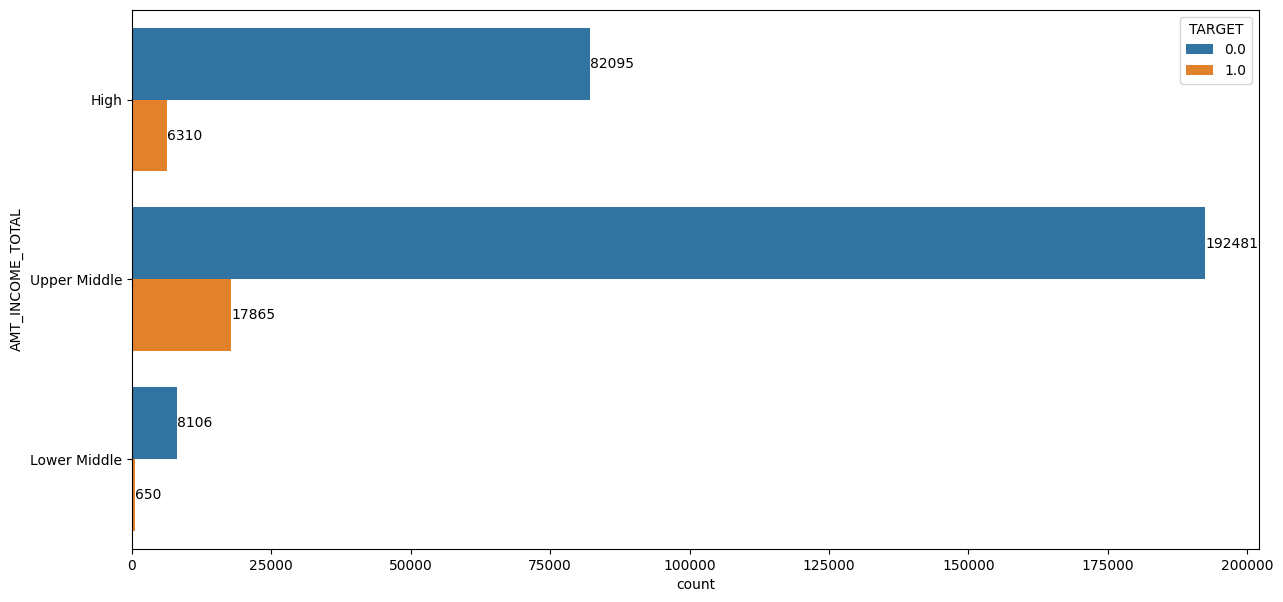

In [ ]:
fig = plt.figure(figsize=(32,7))
gs = fig.add_gridspec(1,2)
ax_AMT_INCOME_TOTAL = fig.add_subplot(gs[0,0])
db = sns.countplot(data=application_train,y='AMT_INCOME_TOTAL', hue='TARGET', ax = ax_AMT_INCOME_TOTAL)

for i in db.containers:
  db.bar_label(i,)

Berdasarkan kategori total income, customer paling banyak berada di kategori Upper Middle

In [ ]:
#Cek kolom AMT_CREDIT
application_train['AMT_CREDIT'].value_counts()

450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7240
             ... 
487318.5        1
630400.5        1
1875276.0       1
1395895.5       1
1391130.0       1
Name: AMT_CREDIT, Length: 5603, dtype: int64

Customer paling banyak mendapat credit atau pinjaman sebesar 450000

In [ ]:
#Cek kolom AMT_ANNUITY
application_train['AMT_ANNUITY'].value_counts()

9000.0      6385
13500.0     5513
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

Annuitas pinjaman paling banyak adalah 9000

In [ ]:
#Cek kolom AMT_GOODS_PRICE
application_train['AMT_GOODS_PRICE'].value_counts()

450000.0     26300
225000.0     25280
675000.0     24962
900000.0     15415
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [ ]:
#Cek kolom NAME_TYPE_SUITE
application_train['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      249815
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Customer paling banyak tidak ditemani saat mengajukan pinjaman

In [ ]:
#cek kolom NAME_INCOME_TYPE
application_train['NAME_INCOME_TYPE'].value_counts()

Working                 158771
Commercial associate     71616
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Tipe income terbanyak dari customer adalah working.

In [ ]:
#Cek kolom NAME_EDUCATION_TYPE
application_train['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218389
Higher education                  74862
Incomplete higher                 10276
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

Tipe pendidikan customer paling banyak yaitu Secondary

In [ ]:
#Cek kolom 'NAME_FAMILY_STATUS'
application_train['NAME_FAMILY_STATUS'].value_counts()

Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

Customer paling banyak berstatus married.

In [ ]:
#Cek kolom NAME_HOUSING_TYPE
application_train['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272865
With parents            14840
Municipal apartment     11182
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

Tipe tempat tinggal customer paling banyak yaitu House/Apartment

In [ ]:
#Cek kolom REGION_POPULATION_RELATIVE
application_train['REGION_POPULATION_RELATIVE'].value_counts()

0.035792    16406
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11600
            ...  
0.001417      467
0.001333      235
0.000533       39
0.000938       28
0.000290        2
Name: REGION_POPULATION_RELATIVE, Length: 81, dtype: int64

In [ ]:
#Cek kolom DAYS_BIRTH
application_train['DAYS_BIRTH'].value_counts()

-13749.0    43
-13481.0    42
-18248.0    41
-10020.0    41
-15771.0    40
            ..
-24898.0     1
-24868.0     1
-8017.0      1
-25098.0     1
-25061.0     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [ ]:
#Bagi kolom DAYS_BIRTH dengan -365 untuk mendapatkan usia customer
application_train['DAYS_BIRTH'] = round(application_train['DAYS_BIRTH']/-365)

In [ ]:
#Cek isi kolom DAYS_BIRT setelah dibagi dengan -365
application_train['DAYS_BIRTH'].value_counts()

39.0    9023
38.0    8792
37.0    8727
40.0    8602
41.0    8495
28.0    8467
32.0    8313
42.0    8308
43.0    8265
36.0    8152
44.0    8132
31.0    8021
30.0    7776
35.0    7751
33.0    7729
34.0    7659
29.0    7635
54.0    7489
45.0    7385
46.0    7333
47.0    7202
55.0    7139
53.0    7124
57.0    6926
48.0    6907
49.0    6786
52.0    6740
50.0    6696
56.0    6657
60.0    6612
59.0    6479
51.0    6417
27.0    6413
58.0    6371
61.0    5795
63.0    5467
62.0    5362
64.0    5023
26.0    4363
65.0    4318
25.0    4079
24.0    3815
23.0    3669
66.0    2641
22.0    1990
67.0    1834
68.0    1654
21.0     660
69.0     314
Name: DAYS_BIRTH, dtype: int64

Membuat kategori usia generasi
* Baby Boomers = 59 - 77 tahun --> 0
* Gen X = 47 - 58 tahun --> 1
* Milenial = 28 - 46 tahun --> 2
* Gen Z = 13 - 27 tahun --> 3

In [ ]:
application_train.loc[application_train['DAYS_BIRTH'].between(59, 77, inclusive=True), 'DAYS_BIRTH'] = 0
application_train.loc[application_train['DAYS_BIRTH'].between(47, 58, inclusive=True), 'DAYS_BIRTH'] = 1
application_train.loc[application_train['DAYS_BIRTH'].between(28, 46, inclusive=True), 'DAYS_BIRTH'] = 2
application_train.loc[application_train['DAYS_BIRTH'].between(13, 27, inclusive=True), 'DAYS_BIRTH'] = 3

<ipython-input-51-a6853177f7da>:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  application_train.loc[application_train['DAYS_BIRTH'].between(59, 77, inclusive=True), 'DAYS_BIRTH'] = 0
<ipython-input-51-a6853177f7da>:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  application_train.loc[application_train['DAYS_BIRTH'].between(47, 58, inclusive=True), 'DAYS_BIRTH'] = 1
<ipython-input-51-a6853177f7da>:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  application_train.loc[application_train['DAYS_BIRTH'].between(28, 46, inclusive=True), 'DAYS_BIRTH'] = 2
<ipython-input-51-a6853177f7da>:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  application_train.loc[application_train['DAYS_BIRTH'].between(13, 27, inclusive=True), 'DAYS_BIRTH'] = 3


In [ ]:
application_train['DAYS_BIRTH'] = application_train['DAYS_BIRTH'].replace({0: 'Baby Boomer',
                                                                           1: 'Gen X',
                                                                           2: 'Milenial',
                                                                           3: 'Gen Z'})

In [ ]:
#Cek kembali kolom DAYS_BIRT yang baru
application_train['DAYS_BIRTH'].value_counts()

Milenial       154565
Gen X           82454
Baby Boomer     45499
Gen Z           24989
Name: DAYS_BIRTH, dtype: int64

In [ ]:
application_train = pd.read_csv('drive/MyDrive/dataset/application_train_clean.csv')

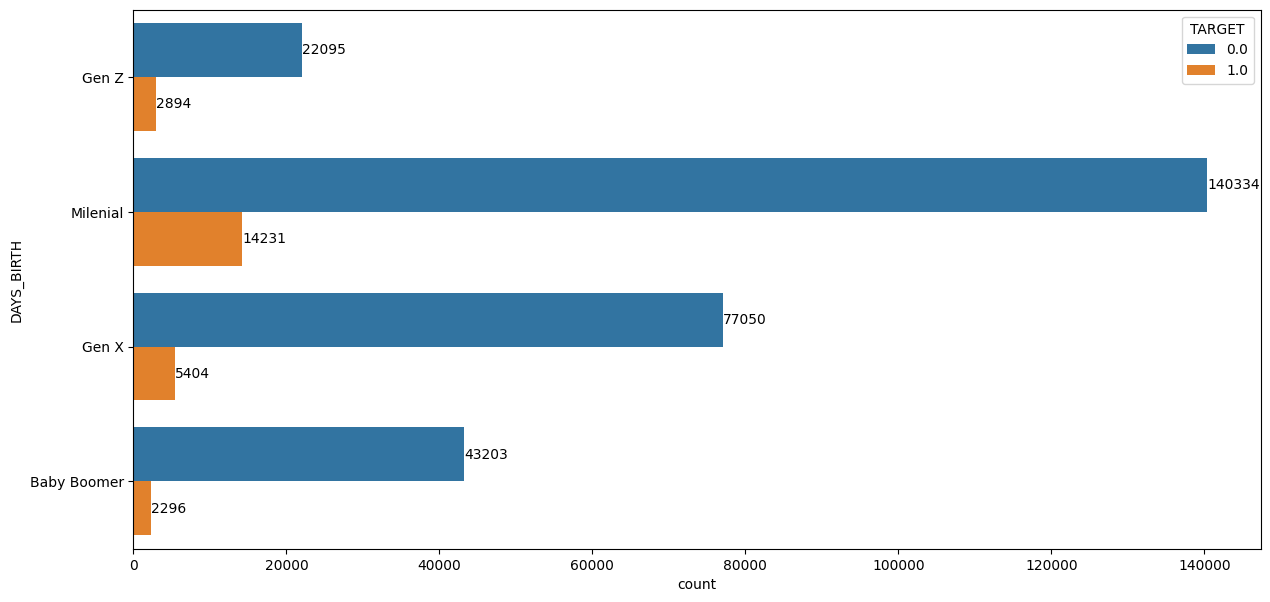

In [ ]:
fig = plt.figure(figsize=(32,7))
gs = fig.add_gridspec(1,2)
ax_days_birth = fig.add_subplot(gs[0,0])
db = sns.countplot(data=application_train,y='DAYS_BIRTH', hue='TARGET', ax = ax_days_birth)

for i in db.containers:
  db.bar_label(i,)

Generasi milenial adalah generasi customer paling banyak

In [ ]:
#Cek kolom DAYS_EMPLOYED
application_train['DAYS_EMPLOYED'].value_counts()

 365243.0    55374
-200.0         156
-224.0         152
-199.0         151
-230.0         151
             ...  
-12588.0         1
-8229.0          1
-12794.0         1
-11823.0         1
-8694.0          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [ ]:
#Cek kolom DAYS_REGISTRATION
application_train['DAYS_REGISTRATION'].value_counts()

-1.0        113
-7.0         98
-6.0         96
-4.0         92
-2.0         92
           ... 
-15581.0      1
-15031.0      1
-14804.0      1
-15008.0      1
-14798.0      1
Name: DAYS_REGISTRATION, Length: 15688, dtype: int64

In [ ]:
#Cek kolom DAYS_ID_PUBLISH
application_train['DAYS_ID_PUBLISH'].value_counts()

-4053.0    169
-4095.0    162
-4046.0    161
-4417.0    159
-4256.0    158
          ... 
-5896.0      1
-5921.0      1
-5753.0      1
-5960.0      1
-6211.0      1
Name: DAYS_ID_PUBLISH, Length: 6168, dtype: int64

In [ ]:
#Cek kolom FLAG_MOBIL
application_train['FLAG_MOBIL'].value_counts()

1.0    307506
0.0         1
Name: FLAG_MOBIL, dtype: int64

In [ ]:
#Cek kolom FLAG_EMP_PHONE
application_train['FLAG_EMP_PHONE'].value_counts()

1.0    252121
0.0     55386
Name: FLAG_EMP_PHONE, dtype: int64

In [ ]:
#Cek kolom FLAG_WORK_PHONE
application_train['FLAG_WORK_PHONE'].value_counts()

0.0    246203
1.0     61304
Name: FLAG_WORK_PHONE, dtype: int64

In [ ]:
#Cek kolom FLAG_CONT_MOBILE
application_train['FLAG_CONT_MOBILE'].value_counts()

1.0    306933
0.0       574
Name: FLAG_CONT_MOBILE, dtype: int64

In [ ]:
#Cek kolom FLAG_PHONE
application_train['FLAG_PHONE'].value_counts()

0.0    221080
1.0     86427
Name: FLAG_PHONE, dtype: int64

In [ ]:
#Cek kolom FLAG_EMAIL
application_train['FLAG_EMAIL'].value_counts()

0.0    290065
1.0     17442
Name: FLAG_EMAIL, dtype: int64

In [ ]:
#Cek kolom OCCUPATION_TYPE
application_train['OCCUPATION_TYPE'].value_counts()

Laborers                 151575
Sales staff               32102
Core staff                27569
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2092
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: OCCUPATION_TYPE, dtype: int64

Jenis pekerjaan customer paling banyak yaitu Laborers

In [ ]:
#Cek kolom CNT_FAM_MEMBERS
application_train['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52600
4.0      24696
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

Sebagian besar customer memiliki jumlah anggota keluarga sebanyak 2

In [ ]:
#Cek kolom REGION_RATING_CLIENT
application_train['REGION_RATING_CLIENT'].value_counts()

2.0    226981
3.0     48329
1.0     32197
Name: REGION_RATING_CLIENT, dtype: int64

In [ ]:
#Cek kolom REGION_RATING_CLIENT_W_CITY
application_train['REGION_RATING_CLIENT_W_CITY'].value_counts()

2.0    229481
3.0     43859
1.0     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

In [ ]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307507.000000,307507.00000,307507.000000,3.075070e+05,307507.000000,3.075070e+05,307507.000000,307507.000000,307507.000000,307507.000000,...,307507.000000,307507.000000,307507.000000,307507.00000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000
mean,278181.527256,0.08073,0.013892,5.990286e+05,27108.580714,5.383178e+05,0.020868,63815.929208,-4986.131376,-2994.201670,...,0.000007,0.003525,0.002937,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
std,102790.132982,0.27242,0.117044,4.024926e+05,14493.522125,3.692898e+05,0.013831,141276.472519,3522.883030,1509.454566,...,0.002550,0.059268,0.054110,0.03476,0.099145,0.016328,0.089799,0.024388,0.022518,0.018299
min,100002.000000,0.00000,0.000000,4.500000e+04,1615.500000,4.050000e+04,0.000290,-17912.000000,-24672.000000,-7197.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189146.500000,0.00000,0.000000,2.700000e+05,16524.000000,2.385000e+05,0.010006,-2760.000000,-7479.500000,-4299.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278203.000000,0.00000,0.000000,5.135310e+05,24903.000000,4.500000e+05,0.018850,-1213.000000,-4504.000000,-3254.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367143.500000,0.00000,0.000000,8.086500e+05,34596.000000,6.795000e+05,0.028663,-289.000000,-2010.000000,-1720.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,1.00000,1.000000,4.050000e+06,258025.500000,4.050000e+06,0.072508,365243.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
application_train.to_csv('application_train_clean.csv', index=False)

###**Bureau**

In [ ]:
bureau = pd.read_csv('/content/drive/MyDrive/TheNightOwls-FinalProject/Dataset/bureau_clean.csv')

In [ ]:
dataFix = pd.read_csv('/content/drive/MyDrive/TheNightOwls-FinalProject/Dataset/DATA_VisuaLLLL_OWL.csv')

In [ ]:
#cek missing value
bureau.isnull().sum()

SK_ID_CURR                0
SK_ID_BUREAU              0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
DAYS_ENDDATE_FACT         0
AMT_CREDIT_MAX_OVERDUE    0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
dtype: int64

####**drop kolom yang mengandung banyak missing value**

In [ ]:
bureau.drop('DAYS_CREDIT_ENDDATE', axis=1, inplace=True)
bureau.drop('DAYS_ENDDATE_FACT', axis=1, inplace=True)
bureau.drop('AMT_CREDIT_MAX_OVERDUE', axis=1, inplace=True)
bureau.drop('AMT_CREDIT_SUM_DEBT', axis=1, inplace=True)
bureau.drop('AMT_CREDIT_SUM_LIMIT', axis=1, inplace=True)
bureau.drop('AMT_ANNUITY', axis=1, inplace=True)

**Handling missing value with modus**

In [ ]:
#Handling missing value
modus_AMT_CREDIT_SUM = bureau['AMT_CREDIT_SUM'].mode()[0]
bureau['AMT_CREDIT_SUM'].fillna(modus_AMT_CREDIT_SUM, inplace = True)

In [ ]:
# checking missing data
total = bureau.isnull().sum().sort_values(ascending = False)
percent = (bureau.isnull().sum()/bureau.isnull().count()*100).sort_values(ascending = False)
missing_bureau_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_data.head(8)

,Total,Percent
SK_ID_CURR,0,0.0
SK_ID_BUREAU,0,0.0
CREDIT_ACTIVE,0,0.0
CREDIT_CURRENCY,0,0.0
DAYS_CREDIT,0,0.0
CREDIT_DAY_OVERDUE,0,0.0
CNT_CREDIT_PROLONG,0,0.0
AMT_CREDIT_SUM,0,0.0


In [ ]:
##cek kolom duplikat
bureau.duplicated().sum()

0

In [ ]:
#simpan file baru
bureau.to_csv('bureau_new.csv', index=False)

####**Insight**

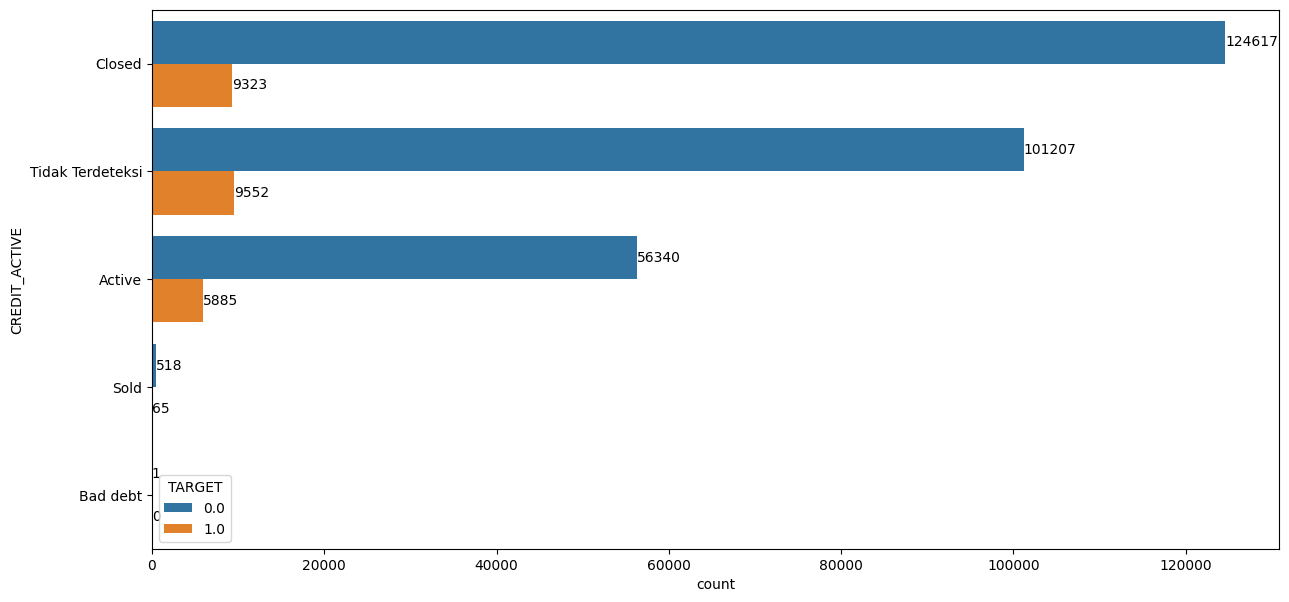

In [ ]:
fig = plt.figure(figsize=(32,7))
gs = fig.add_gridspec(1,2)
ax_CREDIT_ACTIVE = fig.add_subplot(gs[0,0])
db = sns.countplot(data=dataFix,y='CREDIT_ACTIVE', hue='TARGET', ax = ax_CREDIT_ACTIVE)

for i in db.containers:
  db.bar_label(i,)

- sebanyak 696297 customer yang status creditnya "Closed".
- sebanyak 410428 customer yang status creditnya "Active"
- Sebanyak 4227 customer yang status creditnya "Sold"
- Sebanyak 12 customer yang status creditnya "Bad debt"

In [ ]:
bureau['CREDIT_CURRENCY'].value_counts()

currency 1    1110046
currency 2        793
currency 3        118
currency 4          7
Name: CREDIT_CURRENCY, dtype: int64

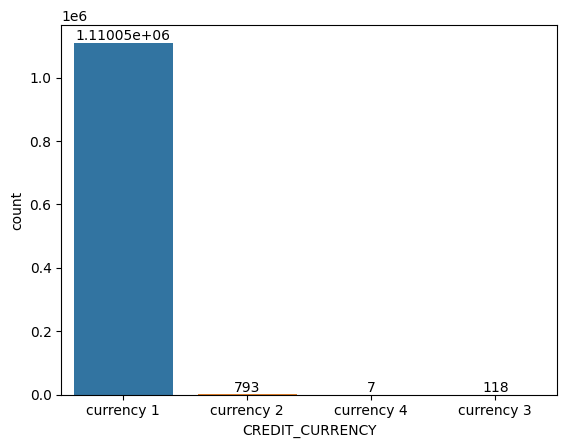

In [ ]:
cc = sns.countplot(data=bureau, x='CREDIT_CURRENCY')

for i in cc.containers:
  cc.bar_label(i,)

<ipython-input-78-980a5bee1a32>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(bureau["DAYS_CREDIT"])


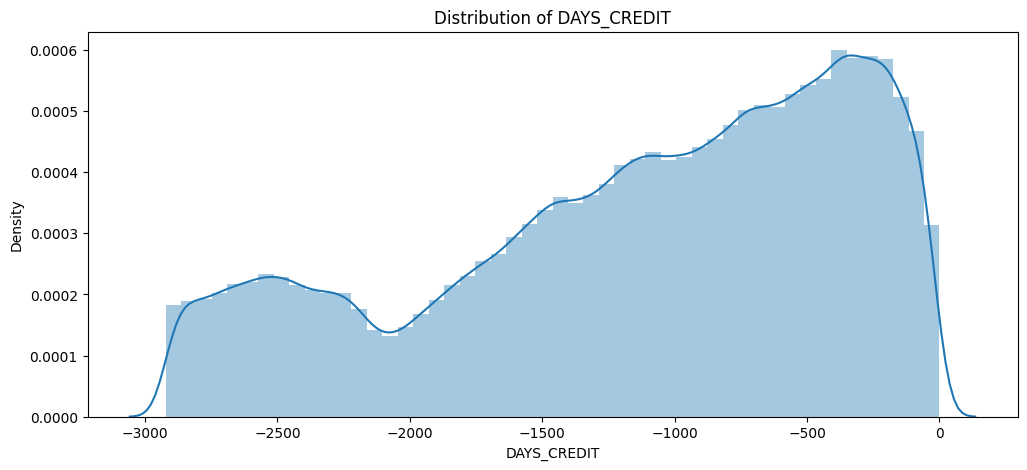

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_CREDIT")
ax = sns.distplot(bureau["DAYS_CREDIT"])

In [ ]:
bureau['CREDIT_DAY_OVERDUE'].value_counts()

0       1712211
30          311
60          126
8           103
13          103
         ...   
1445          1
278           1
707           1
2193          1
1931          1
Name: CREDIT_DAY_OVERDUE, Length: 942, dtype: int64

<ipython-input-26-c76b42d403d1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(bureau["AMT_CREDIT_SUM"])


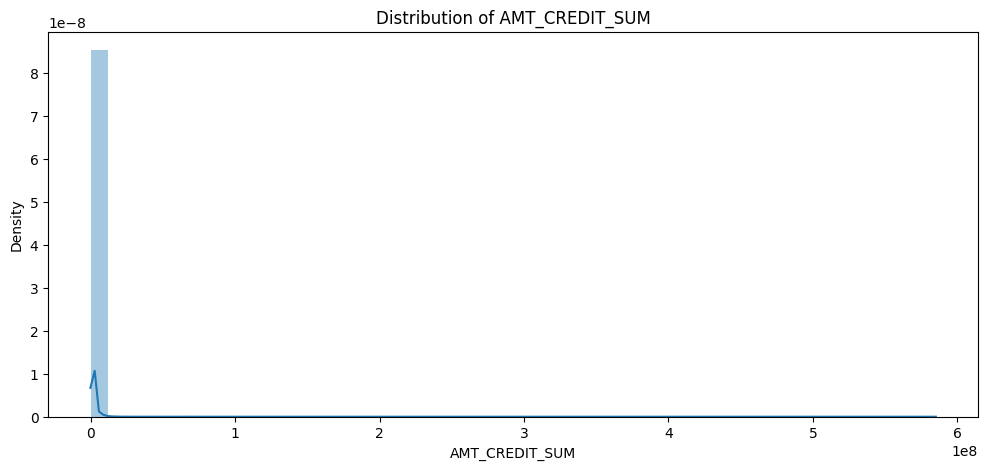

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT_SUM")
ax = sns.distplot(bureau["AMT_CREDIT_SUM"])

<ipython-input-29-2ec0428b5b88>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(bureau["AMT_CREDIT_SUM_OVERDUE"])


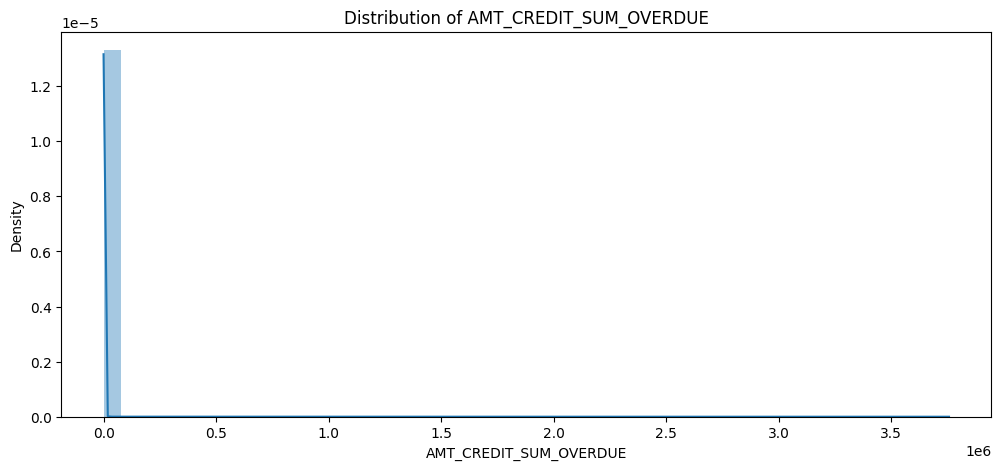

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT_SUM_OVERDUE")
ax = sns.distplot(bureau["AMT_CREDIT_SUM_OVERDUE"])

<ipython-input-30-e2ec9f47ac91>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(bureau["DAYS_CREDIT_UPDATE"])


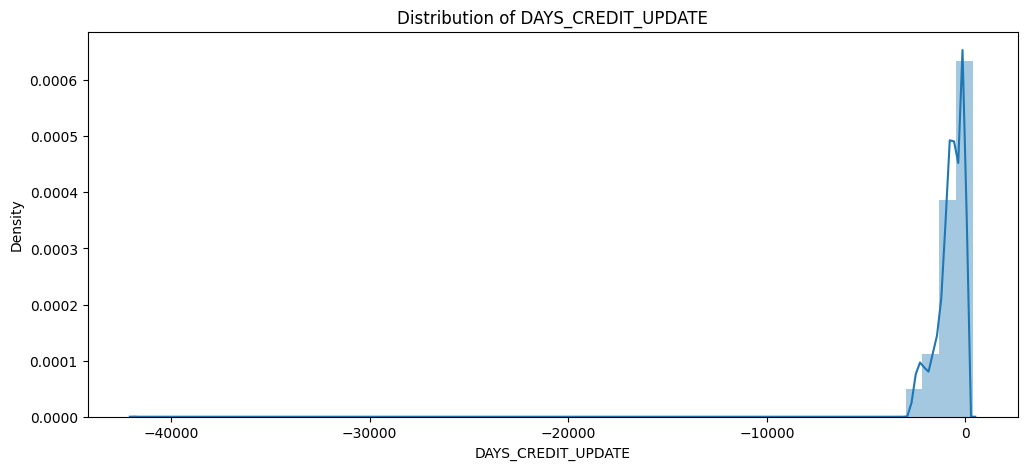

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_CREDIT_UPDATE")
ax = sns.distplot(bureau["DAYS_CREDIT_UPDATE"])

Text(0.5, 1.0, 'Tipe Credit Customer')

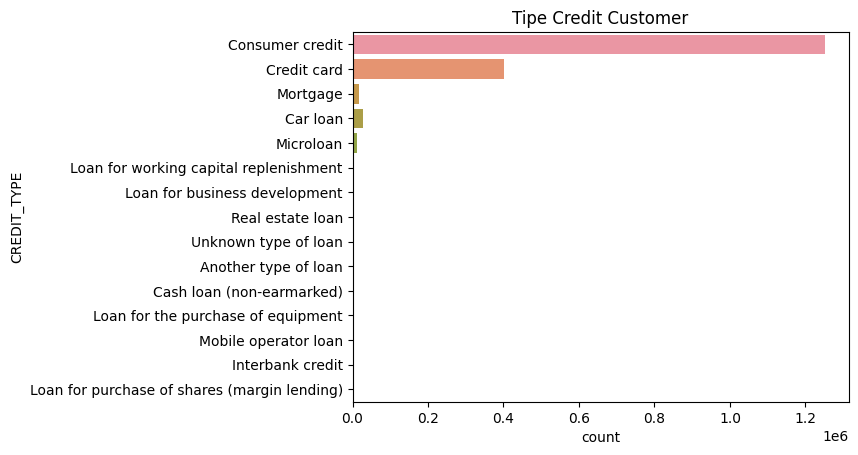

In [ ]:
sns.countplot(data=bureau, y='CREDIT_TYPE')
plt.title('Tipe Credit Customer')

###**Credit Card Balance**

In [ ]:
ccd

,SK_ID_PREV,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.000,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.000,...,31460.086,31460.086,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.000,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,453919.470,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.000,...,453919.470,453919.470,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962418,1545164,260671.500,270000,0.0,0.0,0.0,0.0,13500.000,13500.0,13500.000,...,260671.500,260671.500,0.0,0,0.0,0.0,49.0,Active,0,0
1962419,2029117,81697.270,765000,20250.0,20250.0,0.0,0.0,0.000,6750.0,2051.055,...,81697.270,81697.270,2.0,2,0.0,0.0,0.0,Active,0,0
1962420,1083973,81697.270,765000,20250.0,20250.0,0.0,0.0,0.000,6750.0,2051.055,...,81697.270,81697.270,2.0,2,0.0,0.0,0.0,Active,0,0
1962421,1409561,277204.100,450000,4500.0,4500.0,0.0,0.0,13537.980,14220.0,23.085,...,277204.100,277204.100,1.0,1,0.0,0.0,13.0,Active,0,0


In [ ]:
ccd['NAME_CONTRACT_STATUS'].value_counts()

Active           1935653
Completed          16362
Signed              9101
Demand               772
Sent proposal        513
Refused               17
Approved               5
Name: NAME_CONTRACT_STATUS, dtype: int64

Text(0.5, 1.0, 'Status kontrak Kredit')

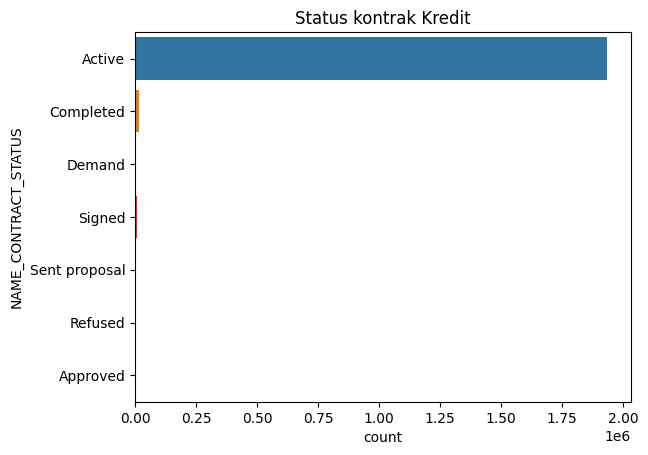

In [ ]:
sns.countplot(data=ccd, y='NAME_CONTRACT_STATUS')
plt.title('Status kontrak Kredit')

<ipython-input-22-ad9679b32565>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(ccd["AMT_PAYMENT_TOTAL_CURRENT"])


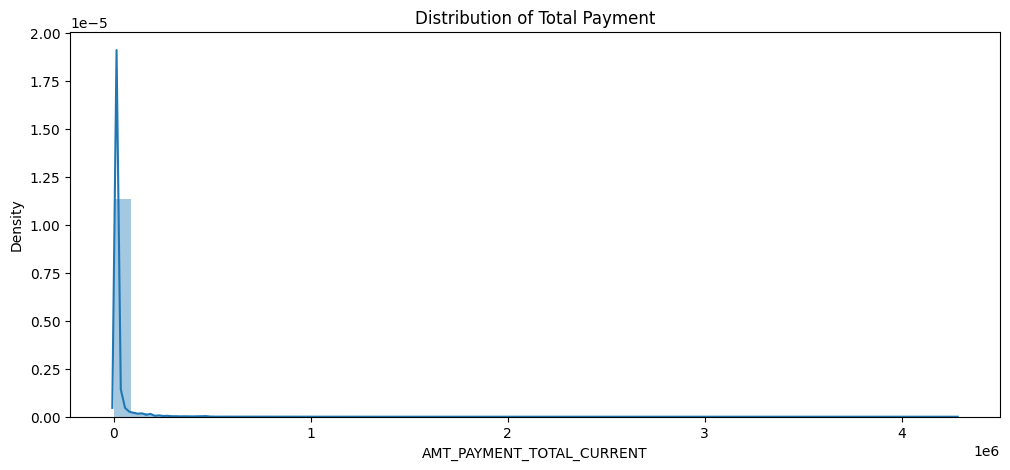

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Total Payment")
ax = sns.distplot(ccd["AMT_PAYMENT_TOTAL_CURRENT"])

<ipython-input-21-c9fb58adbf12>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(ccd["AMT_BALANCE"])


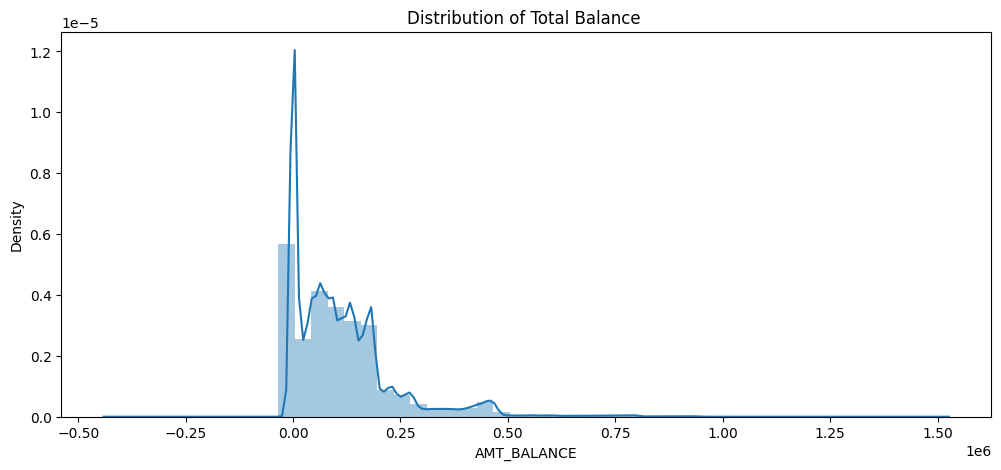

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Total Balance ")
ax = sns.distplot(ccd["AMT_BALANCE"])

<ipython-input-25-3b33ca9aee3d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(ccd["AMT_RECEIVABLE_PRINCIPAL"])


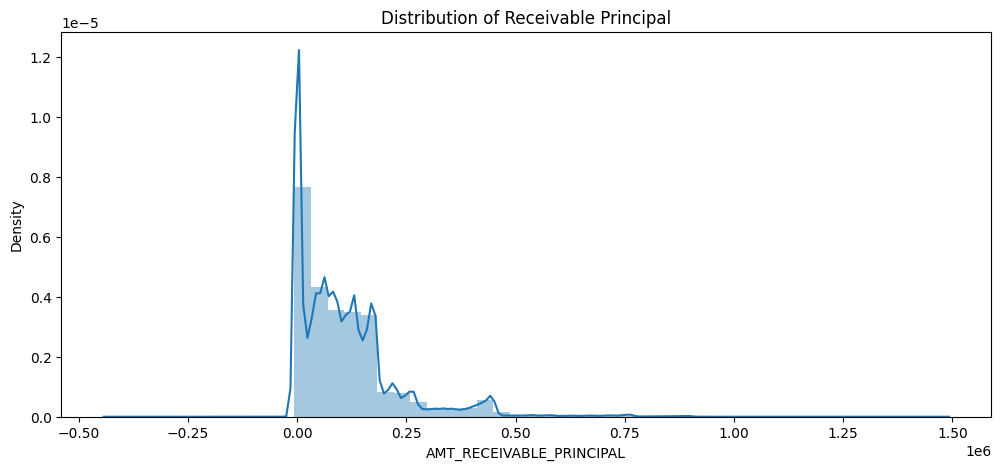

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Receivable Principal")
ax = sns.distplot(ccd["AMT_RECEIVABLE_PRINCIPAL"])

###**Installment Payment**

In [ ]:
ip = pd.read_csv('/content/drive/MyDrive/TheNightOwls-FinalProject/Dataset/installments_payments_clean.csv')

In [ ]:
ip

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605381,2186857,428057,0.0,66,-1624.0,-91.0,67.500,17238.213
13605382,1310347,414406,0.0,47,-1539.0,-91.0,67.500,17238.213
13605383,1308766,402199,0.0,43,-7.0,-91.0,43737.434,17238.213
13605384,1062206,409297,0.0,43,-1986.0,-91.0,67.500,17238.213


<ipython-input-20-575d8d402c6c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(ip["DAYS_INSTALMENT"])


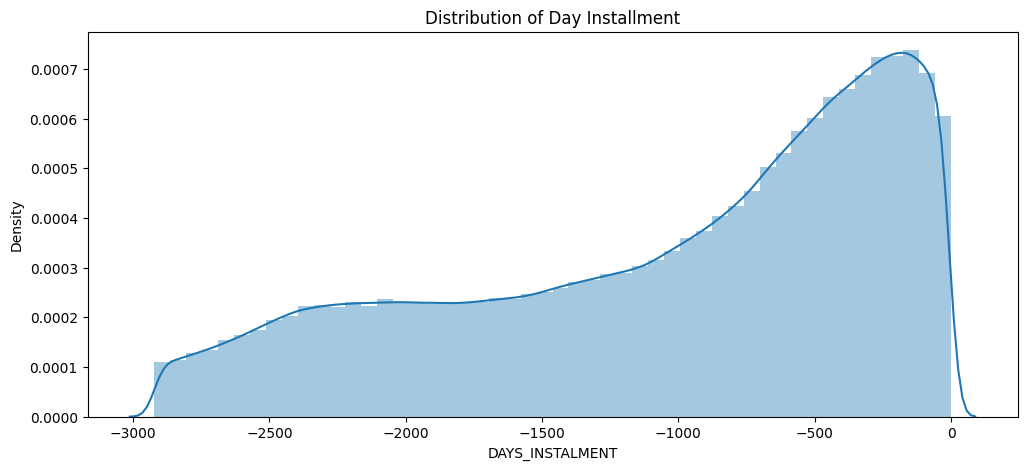

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Day Installment")
ax = sns.distplot(ip["DAYS_INSTALMENT"])

<ipython-input-24-7bc0add81c7f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(ip["DAYS_ENTRY_PAYMENT"])


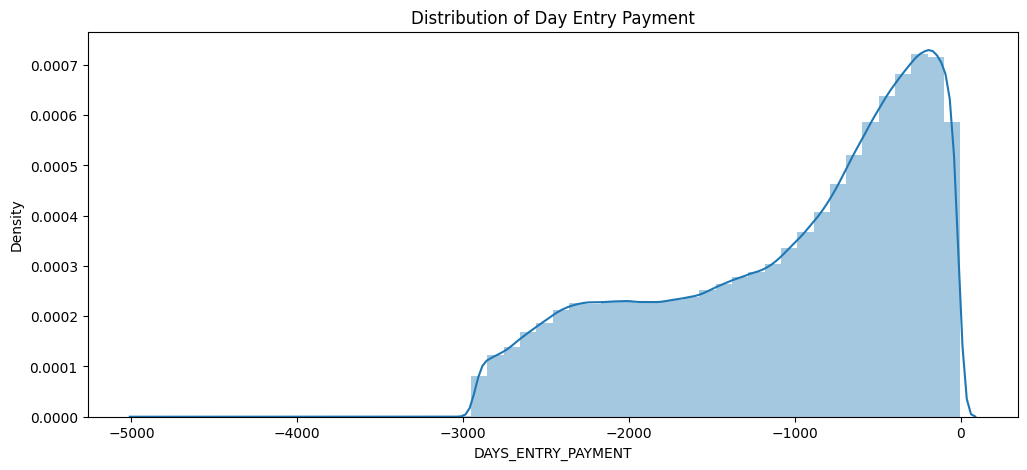

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Day Entry Payment")
ax = sns.distplot(ip["DAYS_ENTRY_PAYMENT"])

## **Membuat Kuadran**

In [ ]:
data = pd.read_csv('drive/MyDrive/dataset/Hasil_Merge.csv')
data

<ipython-input-2-557edda1e5c9>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('drive/MyDrive/dataset/Hasil_Merge.csv')


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_CONTRACT_STATUS_y,DAYS_DECISION,CODE_REJECT_REASON,NAME_PORTFOLIO,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_PAYMENT
0,100002.0,1.0,Cash loans,M,N,Y,0.0,High,406597.5,24700.5,...,Approved,-606.0,XAP,POS,-565.0,125.0,-25.0,-115.0,-133.0,9251.775
1,100003.0,0.0,Cash loans,F,N,N,0.0,High,1293502.5,35698.5,...,Approved,-746.0,XAP,Cash,-716.0,-386.0,-536.0,-686.0,-690.0,98356.990
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,Upper Middle,135000.0,6750.0,...,Approved,-815.0,XAP,POS,-784.0,-694.0,-724.0,-754.0,-763.0,5357.250
3,100006.0,0.0,Cash loans,F,N,Y,0.0,Upper Middle,312682.5,29686.5,...,Approved,-181.0,XAP,Cash,-151.0,1259.0,-151.0,-221.0,-226.0,29027.520
4,100007.0,0.0,Cash loans,M,N,Y,0.0,Upper Middle,513000.0,21865.5,...,Approved,-865.0,XAP,Cash,-834.0,-324.0,-354.0,-2236.0,-2234.0,1834.290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307503,456251.0,0.0,Cash loans,M,N,N,0.0,Upper Middle,254700.0,27558.0,...,Approved,-273.0,XAP,POS,-210.0,0.0,-30.0,-60.0,-101.0,6605.910
307504,456252.0,0.0,Cash loans,F,N,Y,0.0,Upper Middle,269550.0,12001.5,...,Approved,-2497.0,XAP,POS,-2466.0,-2316.0,-2316.0,-2316.0,-2328.0,10046.880
307505,456253.0,0.0,Cash loans,F,N,Y,0.0,Upper Middle,677664.0,29979.0,...,Approved,-1909.0,XAP,POS,-1866.0,-1716.0,-1716.0,-2722.0,-2744.0,3971.880
307506,456254.0,1.0,Cash loans,F,N,Y,0.0,Upper Middle,370107.0,20205.0,...,Approved,-277.0,XAP,POS,-247.0,203.0,365243.0,-67.0,-78.0,19065.824


In [ ]:
#Ubah ke dalam bentuk bulan
data['DAYS_LAST_DUE'] = abs(round(data['DAYS_LAST_DUE']/30))
data['DAYS_LAST_DUE_1ST_VERSION'] = abs(round(data['DAYS_LAST_DUE_1ST_VERSION']/30))
data['DAYS_FIRST_DUE'] = abs(round(data['DAYS_FIRST_DUE']/30))
data['DAYS_INSTALMENT'] = abs(round(data['DAYS_INSTALMENT']/30))

In [ ]:
data['AMT_PAYMENT']

0          9251.775
1         98356.990
2          5357.250
3         29027.520
4          1834.290
            ...    
307503     6605.910
307504    10046.880
307505     3971.880
307506    19065.824
307507    11090.835
Name: AMT_PAYMENT, Length: 307508, dtype: float64

In [ ]:
RATIO_PAYMENT = pd.DataFrame(data['AMT_PAYMENT']/data['AMT_CREDIT'])
RATIO_PAYMENT

,0
0,0.022754
1,0.076039
2,0.039683
3,0.092834
4,0.003576
...,...
307503,0.025936
307504,0.037273
307505,0.005861
307506,0.051514


In [ ]:
data['RATIO_PAYMENT'] = RATIO_PAYMENT

In [ ]:
#Mengambil data yang churn
d_churn = (data[data['TARGET']==1])
d_churn

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_DECISION,CODE_REJECT_REASON,NAME_PORTFOLIO,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_PAYMENT,RATIO_PAYMENT
0,100002.0,1.0,Cash loans,M,N,Y,0.0,High,406597.5,24700.5,...,-606.0,XAP,POS,19.0,4.0,1.0,4.0,-133.0,9251.775000,0.022754
26,100031.0,1.0,Cash loans,F,N,Y,0.0,Upper Middle,979992.0,27076.5,...,-238.0,Tidak Terdeteksi,Tidak Terdeteksi,12175.0,12175.0,12175.0,4.0,-91.0,18175.848674,0.018547
40,100047.0,1.0,Cash loans,M,N,Y,0.0,High,1193580.0,35028.0,...,-1172.0,XAP,Cards,12175.0,12175.0,12175.0,80.0,-2398.0,4586.895000,0.003843
42,100049.0,1.0,Cash loans,F,N,N,0.0,Upper Middle,288873.0,16258.5,...,-1480.0,XAP,POS,48.0,39.0,39.0,15.0,-444.0,6103.305000,0.021128
81,100096.0,1.0,Cash loans,F,N,Y,0.0,Upper Middle,252000.0,14593.5,...,-238.0,Tidak Terdeteksi,Tidak Terdeteksi,12175.0,12175.0,12175.0,4.0,-91.0,18175.848674,0.072126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307445,456186.0,1.0,Cash loans,M,N,N,0.0,High,450000.0,32746.5,...,-28.0,XAP,XNA,12175.0,12175.0,12175.0,8.0,-241.0,1088.235000,0.002418
307472,456215.0,1.0,Cash loans,F,N,N,0.0,Upper Middle,1303200.0,46809.0,...,-2239.0,XAP,POS,74.0,63.0,63.0,43.0,-1285.0,24351.074000,0.018686
307478,456225.0,1.0,Cash loans,M,N,Y,0.0,High,297000.0,19975.5,...,-1096.0,XAP,Cash,36.0,1.0,1.0,28.0,-846.0,16585.650000,0.055844
307486,456233.0,1.0,Cash loans,F,N,Y,0.0,High,521280.0,23089.5,...,-307.0,XAP,POS,9.0,2.0,12175.0,7.0,-206.0,2250.000000,0.004316


In [ ]:
data['RATIO_PAYMENT'].value_counts()

0.134636    529
0.013464    524
0.026927    497
0.040391    495
0.020195    440
           ... 
0.016910      1
0.013270      1
0.010585      1
0.076716      1
0.016431      1
Name: RATIO_PAYMENT, Length: 281582, dtype: int64

In [ ]:
#Membuat kategori kuadran berdasarkan ratio payment
d_churn.loc[d_churn['RATIO_PAYMENT'].between(0,0.25, inclusive=True), 'KUADRAN'] = 1
d_churn.loc[d_churn['RATIO_PAYMENT'].between(0.26,0.50, inclusive=True), 'KUADRAN'] = 2
d_churn.loc[d_churn['RATIO_PAYMENT'].between(0.51,0.75, inclusive=True), 'KUADRAN'] = 3
d_churn.loc[d_churn['RATIO_PAYMENT'].between(0.76, 1.0, inclusive=True), 'KUADRAN'] = 4

<ipython-input-9-db1d9d9a9da0>:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  d_churn.loc[d_churn['RATIO_PAYMENT'].between(0,0.25, inclusive=True), 'KUADRAN'] = 1
<ipython-input-9-db1d9d9a9da0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_churn.loc[d_churn['RATIO_PAYMENT'].between(0,0.25, inclusive=True), 'KUADRAN'] = 1
<ipython-input-9-db1d9d9a9da0>:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  d_churn.loc[d_churn['RATIO_PAYMENT'].between(0.26,0.50, inclusive=True), 'KUADRAN'] = 2
<ipython-input-9-db1d9d9a9da0>:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `n

In [ ]:
d_churn['KUADRAN'].value_counts()

1.0    24417
2.0      219
3.0       66
4.0       39
Name: KUADRAN, dtype: int64

###**Visualisasi Kuadran 1**

In [ ]:
#Ambil data kuadran 1
k_1 = (d_churn[d_churn['KUADRAN']==1])
k_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CODE_REJECT_REASON,NAME_PORTFOLIO,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_PAYMENT,RATIO_PAYMENT,KUADRAN
0,100002.0,1.0,Cash loans,M,N,Y,0.0,High,406597.5,24700.5,...,XAP,POS,19.0,4.0,1.0,4.0,-133.0,9251.775000,0.022754,1.0
26,100031.0,1.0,Cash loans,F,N,Y,0.0,Upper Middle,979992.0,27076.5,...,Tidak Terdeteksi,Tidak Terdeteksi,12175.0,12175.0,12175.0,4.0,-91.0,18175.848674,0.018547,1.0
40,100047.0,1.0,Cash loans,M,N,Y,0.0,High,1193580.0,35028.0,...,XAP,Cards,12175.0,12175.0,12175.0,80.0,-2398.0,4586.895000,0.003843,1.0
42,100049.0,1.0,Cash loans,F,N,N,0.0,Upper Middle,288873.0,16258.5,...,XAP,POS,48.0,39.0,39.0,15.0,-444.0,6103.305000,0.021128,1.0
81,100096.0,1.0,Cash loans,F,N,Y,0.0,Upper Middle,252000.0,14593.5,...,Tidak Terdeteksi,Tidak Terdeteksi,12175.0,12175.0,12175.0,4.0,-91.0,18175.848674,0.072126,1.0


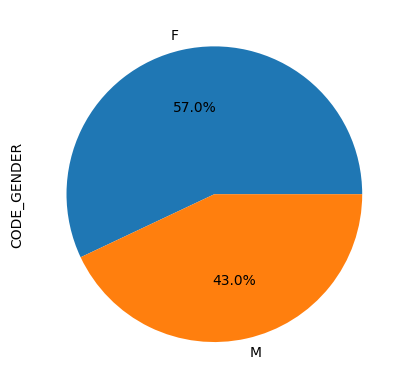

In [ ]:
#Menampilkan jenis kelamin customer pada kuadran 1
k_1['CODE_GENDER'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

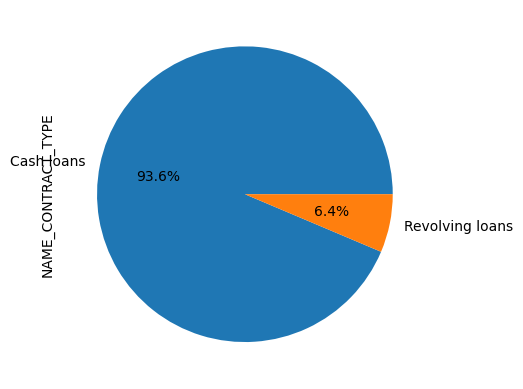

In [ ]:
#Menampilkan tipe kontrak customer pada kuadran 1
k_1['NAME_CONTRACT_TYPE'].value_counts().plot(kind='pie', autopct='%2.1f%%')
plt.show()

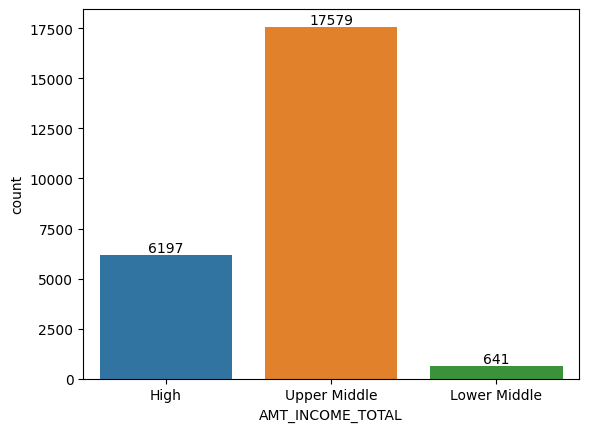

In [ ]:
db = sns.countplot(data=k_1,x='AMT_INCOME_TOTAL')

for i in db.containers:
  db.bar_label(i,)

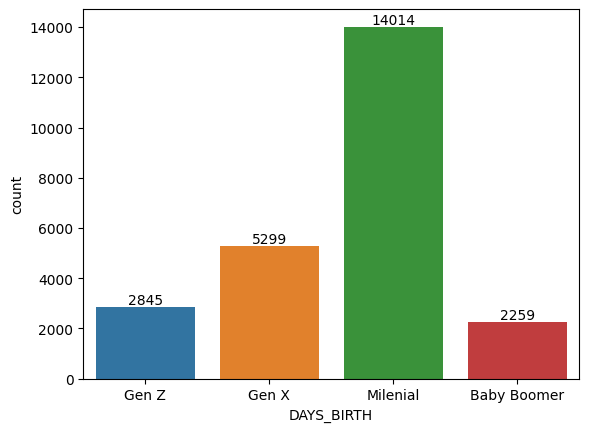

In [ ]:
db = sns.countplot(data=k_1,x='DAYS_BIRTH')

for i in db.containers:
  db.bar_label(i,)

In [ ]:
k_1['AMT_CREDIT'].mean()

560486.2441946185

In [ ]:
k_1['AMT_CREDIT'].value

In [ ]:
k_1['DAYS_FIRST_DUE'].value_counts().head(5)

12175.0    8905
9.0         441
8.0         436
10.0        432
7.0         409
Name: DAYS_FIRST_DUE, dtype: int64

In [ ]:
k_1['DAYS_LAST_DUE'].value_counts().head(5)

12175.0    12305
8.0          389
6.0          370
4.0          362
7.0          352
Name: DAYS_LAST_DUE, dtype: int64

In [ ]:
k_1['DAYS_LAST_DUE_1ST_VERSION'].value_counts().head(5)

12175.0    9894
2.0         679
4.0         638
1.0         604
3.0         551
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: int64

In [ ]:
k_1['DAYS_INSTALMENT'].value_counts().head(5)

4.0    1734
5.0     765
3.0     761
2.0     755
6.0     718
Name: DAYS_INSTALMENT, dtype: int64

###**Visualisasi Kuadran 2**

In [ ]:
#Ambil data kuadran 2
k_2 = (d_churn[d_churn['KUADRAN']==2])
k_2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CODE_REJECT_REASON,NAME_PORTFOLIO,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_PAYMENT,RATIO_PAYMENT,KUADRAN
870,100996.0,1.0,Cash loans,F,N,N,0.0,Upper Middle,675000.0,26154.0,...,XAP,Cash,30.0,5.0,24.0,24.0,-713.0,268076.530,0.397150,2.0
1644,101929.0,1.0,Revolving loans,F,Y,Y,0.0,High,450000.0,22500.0,...,XAP,XNA,12175.0,12175.0,12175.0,3.0,-98.0,216870.250,0.481934,2.0
4946,105788.0,1.0,Cash loans,M,N,Y,0.0,Upper Middle,545040.0,26640.0,...,XAP,XNA,12175.0,12175.0,12175.0,82.0,-2472.0,164278.270,0.301406,2.0
5171,106050.0,1.0,Cash loans,F,N,Y,0.0,Upper Middle,247500.0,19971.0,...,XAP,Cash,29.0,18.0,23.0,23.0,-710.0,113817.060,0.459867,2.0
6329,107384.0,1.0,Cash loans,F,N,N,0.0,Lower Middle,94500.0,4954.5,...,XAP,XNA,12175.0,12175.0,12175.0,2.0,-80.0,25642.664,0.271351,2.0


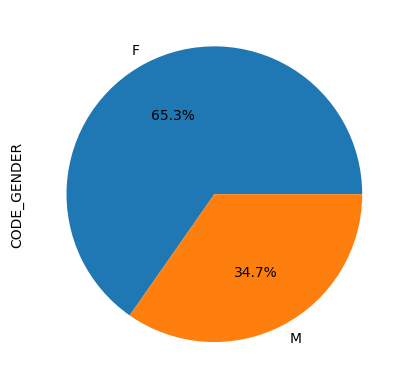

In [ ]:
#Menampilkan jenis kelamin customer pada kuadran 2
k_2['CODE_GENDER'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

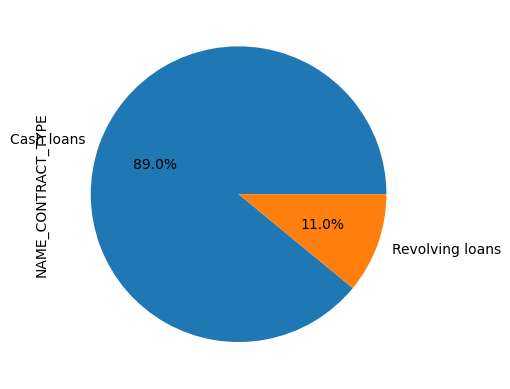

In [ ]:
#Menampilkan tipe kontrak customer pada kuadran 2
k_2['NAME_CONTRACT_TYPE'].value_counts().plot(kind='pie', autopct='%2.1f%%')
plt.show()

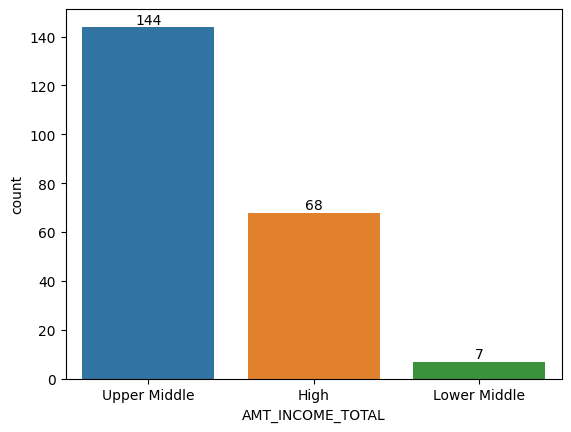

In [ ]:
db = sns.countplot(data=k_2,x='AMT_INCOME_TOTAL')

for i in db.containers:
  db.bar_label(i,)

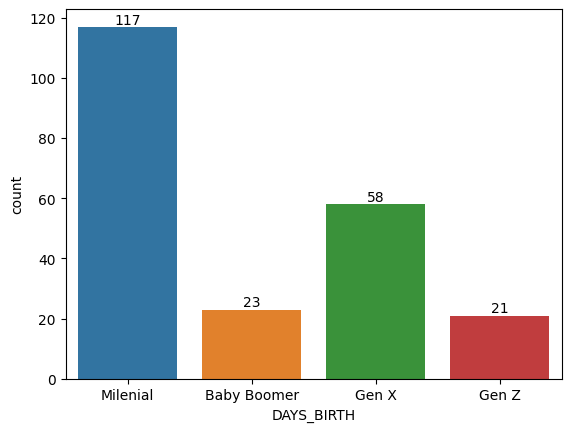

In [ ]:
db = sns.countplot(data=k_2,x='DAYS_BIRTH')

for i in db.containers:
  db.bar_label(i,)

In [ ]:
k_2['AMT_CREDIT'].mean()

386556.0410958904

In [ ]:
k_2['DAYS_FIRST_DUE'].value_counts().head(5)

12175.0    85
20.0       11
21.0        8
5.0         7
19.0        6
Name: DAYS_FIRST_DUE, dtype: int64

In [ ]:
k_2['DAYS_LAST_DUE'].value_counts().head(5)

12175.0    106
4.0          6
15.0         6
10.0         6
23.0         5
Name: DAYS_LAST_DUE, dtype: int64

In [ ]:
k_2['DAYS_LAST_DUE_1ST_VERSION'].value_counts().head(5)

12175.0    92
6.0         8
4.0         7
5.0         6
2.0         6
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: int64

In [ ]:
k_2['DAYS_INSTALMENT'].value_counts().head(5)

4.0     17
6.0     13
16.0    13
9.0     12
15.0    10
Name: DAYS_INSTALMENT, dtype: int64

###**Visualisasi Kuadran 3**

In [ ]:
#Ambil data kuadran 3
k_3 = (d_churn[d_churn['KUADRAN']==3])
k_3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CODE_REJECT_REASON,NAME_PORTFOLIO,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_PAYMENT,RATIO_PAYMENT,KUADRAN
2385,102789.0,1.0,Cash loans,F,N,Y,0.0,Upper Middle,593010.0,23107.5,...,XAP,POS,23.0,0.0,23.0,23.0,-696.0,401670.38,0.677342,3.0
3167,103702.0,1.0,Cash loans,M,Y,Y,0.0,High,625356.0,24363.0,...,XAP,XNA,12175.0,12175.0,12175.0,19.0,-577.0,459686.47,0.735080,3.0
7020,108173.0,1.0,Cash loans,M,N,N,0.0,Upper Middle,634482.0,24714.0,...,SCO,Cash,12175.0,12175.0,12175.0,9.0,-283.0,358179.16,0.564522,3.0
10479,112202.0,1.0,Cash loans,F,Y,N,1.0,Upper Middle,512338.5,24012.0,...,XAP,POS,43.0,28.0,32.0,32.0,-966.0,316146.28,0.617065,3.0
13073,115236.0,1.0,Cash loans,M,Y,N,0.0,Upper Middle,528637.5,62865.0,...,SCO,Cash,12175.0,12175.0,12175.0,5.0,-164.0,295700.25,0.559363,3.0


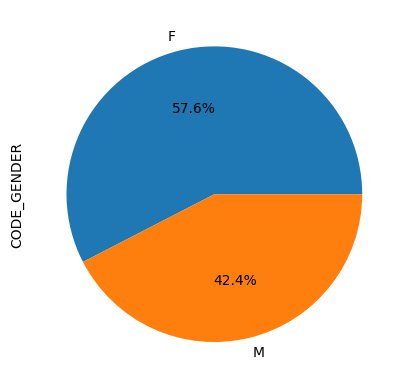

In [ ]:
#Menampilkan jenis kelamin customer pada kuadran 3
k_3['CODE_GENDER'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

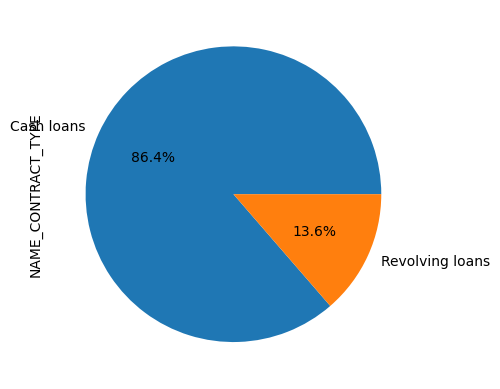

In [ ]:
#Menampilkan tipe kontrak customer pada kuadran 3
k_3['NAME_CONTRACT_TYPE'].value_counts().plot(kind='pie', autopct='%2.1f%%')
plt.show()

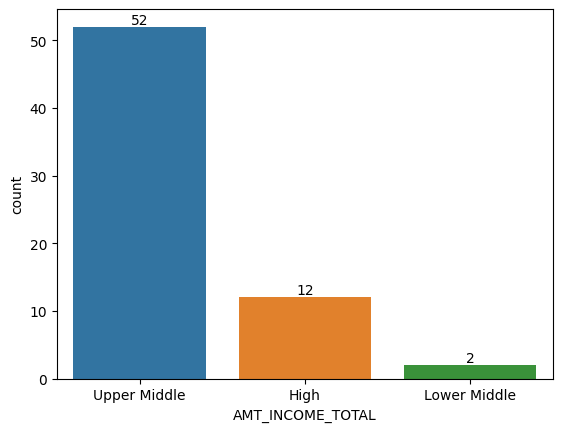

In [ ]:
db = sns.countplot(data=k_3,x='AMT_INCOME_TOTAL')

for i in db.containers:
  db.bar_label(i,)

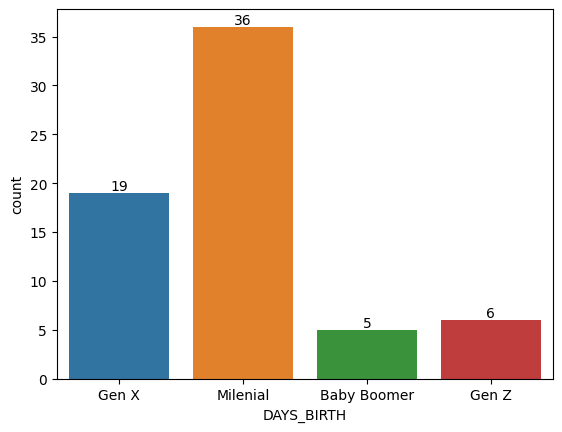

In [ ]:
db = sns.countplot(data=k_3,x='DAYS_BIRTH')

for i in db.containers:
  db.bar_label(i,)

In [ ]:
k_3['AMT_CREDIT'].mean()

498716.45454545453

In [ ]:
k_3['DAYS_FIRST_DUE'].value_counts().head(5)

12175.0    27
14.0        4
19.0        3
23.0        3
27.0        2
Name: DAYS_FIRST_DUE, dtype: int64

In [ ]:
k_3['DAYS_LAST_DUE'].value_counts().head(5)

12175.0    31
2.0         4
13.0        3
23.0        2
12.0        2
Name: DAYS_LAST_DUE, dtype: int64

In [ ]:
k_3['DAYS_LAST_DUE_1ST_VERSION'].value_counts().head(5)

12175.0    28
4.0         4
6.0         3
22.0        2
21.0        2
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: int64

In [ ]:
k_3['DAYS_INSTALMENT'].value_counts().head(5)

5.0     5
8.0     5
2.0     5
23.0    4
15.0    4
Name: DAYS_INSTALMENT, dtype: int64

###**Visualisasi Kuadran 4**

In [ ]:
#Ambil data kuadran 4
k_4 = (d_churn[d_churn['KUADRAN']==4])
k_4.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CODE_REJECT_REASON,NAME_PORTFOLIO,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_PAYMENT,RATIO_PAYMENT,KUADRAN
1665,101950.0,1.0,Cash loans,F,N,Y,0.0,Upper Middle,552555.0,19975.5,...,XAP,Cash,9.0,14.0,4.0,4.0,-134.0,420881.250,0.761700,4.0
2119,102491.0,1.0,Cash loans,M,Y,Y,0.0,Upper Middle,52128.0,6025.5,...,XAP,XNA,12175.0,12175.0,12175.0,20.0,-601.0,50011.785,0.959403,4.0
23467,127302.0,1.0,Cash loans,M,Y,Y,0.0,High,254700.0,20119.5,...,XAP,POS,18.0,5.0,8.0,8.0,-252.0,208763.950,0.819646,4.0
25130,129229.0,1.0,Revolving loans,F,N,Y,0.0,Upper Middle,270000.0,13500.0,...,XAP,Cash,1.0,58.0,12175.0,2.0,-64.0,218079.190,0.807701,4.0
35795,141459.0,1.0,Cash loans,F,N,Y,0.0,High,900000.0,46084.5,...,XAP,Cards,32.0,12175.0,22.0,23.0,-714.0,855813.200,0.950904,4.0


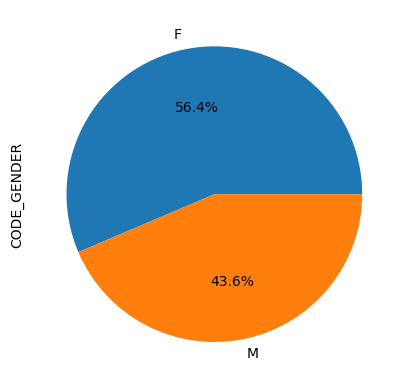

In [ ]:
#Menampilkan jenis kelamin customer pada kuadran 4
k_4['CODE_GENDER'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

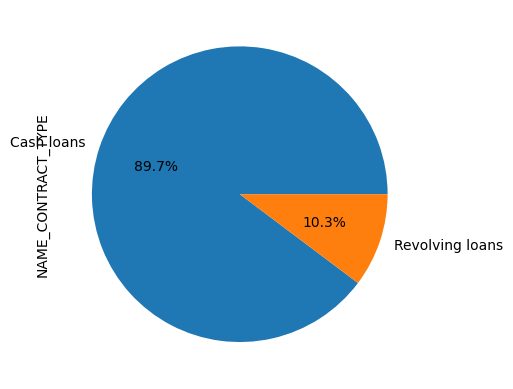

In [ ]:
#Menampilkan tipe kontrak customer pada kuadran 4
k_4['NAME_CONTRACT_TYPE'].value_counts().plot(kind='pie', autopct='%2.1f%%')
plt.show()

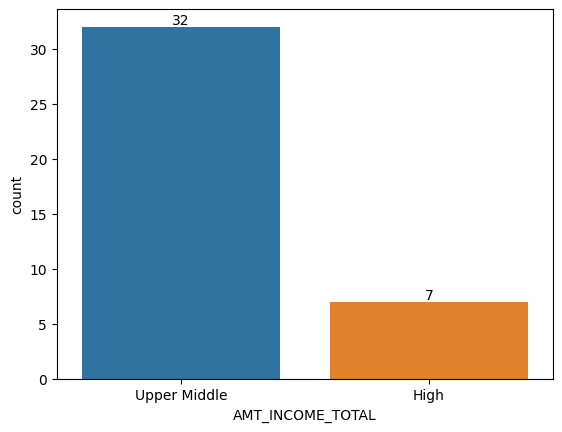

In [ ]:
db = sns.countplot(data=k_4,x='AMT_INCOME_TOTAL')

for i in db.containers:
  db.bar_label(i,)

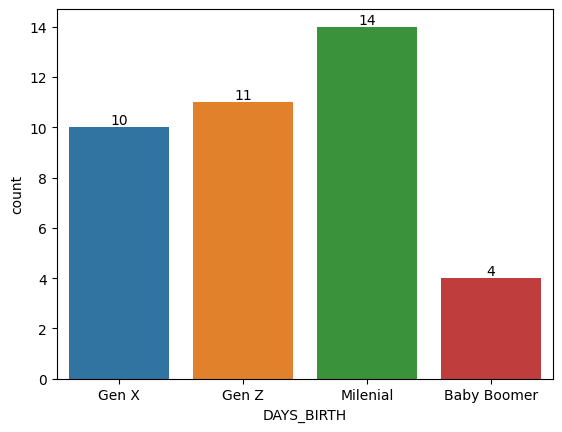

In [ ]:
db = sns.countplot(data=k_4,x='DAYS_BIRTH')

for i in db.containers:
  db.bar_label(i,)

In [ ]:
k_4['AMT_CREDIT'].mean()

407493.6923076923

In [ ]:
k_4['DAYS_FIRST_DUE'].value_counts().head()

12175.0    13
23.0        2
8.0         2
36.0        2
12.0        2
Name: DAYS_FIRST_DUE, dtype: int64

In [ ]:
k_4['DAYS_LAST_DUE'].value_counts().head()

12175.0    16
8.0         3
7.0         3
5.0         2
24.0        2
Name: DAYS_LAST_DUE, dtype: int64

In [ ]:
k_4['DAYS_LAST_DUE_1ST_VERSION'].value_counts().head()

12175.0    14
14.0        2
51.0        2
13.0        2
1.0         2
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: int64

In [ ]:
k_4['DAYS_INSTALMENT'].value_counts().head()

5.0     5
6.0     5
10.0    4
20.0    3
8.0     3
Name: DAYS_INSTALMENT, dtype: int64